# How to create regular grids

In [1]:
from nes import *
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

This corresponds to a regular grid for CAMS-REG-v5.1

In [3]:
projection='regular'
lat_orig = 29.995
lon_orig = -30.0
inc_lat = 0.05
inc_lon = 0.1
n_lat = 840
n_lon = 900

In [4]:
nessy = create_nes(comm=None, info=False, projection=projection,
                   lat_orig=lat_orig, lon_orig=lon_orig, inc_lat=inc_lat, inc_lon=inc_lon, 
                   n_lat=n_lat, n_lon=n_lon)

### Read projection

In [5]:
nessy.projection

Proj('+proj=longlat +ellps=WGS84 +no_defs', preserve_units=True)

In [6]:
nessy.projection_data

{'grid_mapping_name': 'latitude_longitude',
 'semi_major_axis': 6378137.0,
 'inverse_flattening': 0,
 'inc_lat': 0.05,
 'inc_lon': 0.1,
 'lat_orig': 29.995,
 'lon_orig': -30.0,
 'n_lat': 840,
 'n_lon': 900}

## 2. Plot

In [7]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-30.00000 29.99500, -29.90000 29.995..."
1,"POLYGON ((-29.90000 29.99500, -29.80000 29.995..."
2,"POLYGON ((-29.80000 29.99500, -29.70000 29.995..."
3,"POLYGON ((-29.70000 29.99500, -29.60000 29.995..."
4,"POLYGON ((-29.60000 29.99500, -29.50000 29.995..."
...,...
755995,"POLYGON ((59.50000 71.94500, 59.60000 71.94500..."
755996,"POLYGON ((59.60000 71.94500, 59.70000 71.94500..."
755997,"POLYGON ((59.70000 71.94500, 59.80000 71.94500..."


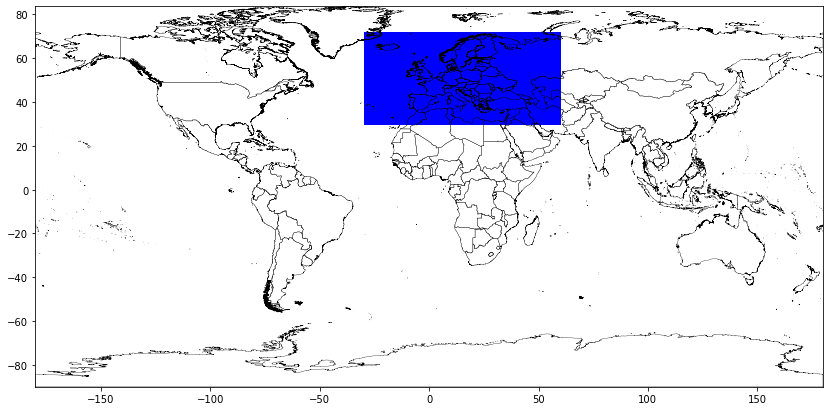

In [8]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor='blue', edgecolor='blue')
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [9]:
nessy.to_netcdf('regular_grid.nc', info=True)

Rank 000: Creating regular_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [10]:
nessy.to_shapefile('regular_grid_shp')

/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3058: UserWarning: No vertical level has been specified. The first one will be selected.
  warnings.warn(msg)
/esarchive/scratch/avilanova/software/NES/nes/nc_projections/default_nes.py:3069: UserWarning: No time has been specified. The first one will be selected.
  warnings.warn(msg)
